SqueezeNet trained on ImageNet https://medium.freecodecamp.org/recognizing-traffic-lights-with-deep-learning-23dae23287cc

## Import Dependencies

In [11]:
from keras import applications,optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model 

from keras.layers import Input, Convolution2D, MaxPooling2D, Activation, concatenate, Dropout, warnings
from keras.layers import Dropout, Flatten, Dense

from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D

from keras_squeezenet import SqueezeNet

In [12]:
import shutil,os
import pandas as pd
import yaml
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Prepare for training

In [43]:
img_width, img_height = 227, 227
train_data_dir = "data/full-image/original-dataset/train"
validation_data_dir = "data/full-image/original-dataset/valid"
nb_train_samples = 208
nb_validation_samples = 48 
batch_size = 16
epochs = 100

In [44]:
train_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = False,
fill_mode = "nearest",
zoom_range = 0.0,
width_shift_range = 0.0,
height_shift_range=0.0,
rotation_range=0)

In [45]:
valid_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = False,
fill_mode = "nearest",
zoom_range = 0.0,
width_shift_range = 0.0,
height_shift_range=0.0,
rotation_range=0)

print(train_generator.class_indices)


{'Yellow': 2, 'noColor': 3, 'Green': 0, 'Red': 1}


In [46]:
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical")

print(train_generator.class_indices)


Found 162 images belonging to 4 classes.
{'Yellow': 2, 'noColor': 3, 'Green': 0, 'Red': 1}


## Replace output layer with our own layers for transfer learning

In [18]:
classes = 4

model = SqueezeNet(include_top=False, pooling=None , input_shape=(227,227,3))
for layer in model.layers:
    #print(layer.trainable, end=',')
    layer.trainable = False

x = model.output
#reducing the size through convolutions so parameters stay reasonable
x = Dropout(0.5, name='drop9')(x)
x = Convolution2D(50, kernel_size=(3, 3), strides=(2,2), padding='valid', name='conv10')(x)
x = Activation('relu', name='relu_conv10')(x)

x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.6)(x)
x = Dense(512, activation="relu")(x)
x = Dense(classes, activation="softmax")(x)

model_final = Model(inputs = model.input, outputs = x)
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.00005, momentum=0.9), metrics=["accuracy"])

## Train model

In [17]:
model_final.fit_generator(
train_generator,
steps_per_epoch = 75,# nb_train_samples/batch_size,
epochs = 200,
validation_data = validation_generator,
validation_steps = nb_validation_samples/batch_size)

Epoch 1/200
75/75 [==============================] - 31s 408ms/step - loss: 2.9576 - acc: 0.2792 - val_loss: 1.3859 - val_acc: 0.2121
Epoch 2/200
75/75 [==============================] - 31s 418ms/step - loss: 1.4673 - acc: 0.2611 - val_loss: 1.3865 - val_acc: 0.2121
Epoch 3/200
75/75 [==============================] - 32s 426ms/step - loss: 1.4195 - acc: 0.2768 - val_loss: 1.3865 - val_acc: 0.2576
Epoch 4/200
75/75 [==============================] - 32s 421ms/step - loss: 1.4019 - acc: 0.3008 - val_loss: 1.3854 - val_acc: 0.2424
Epoch 5/200
75/75 [==============================] - 32s 432ms/step - loss: 1.3694 - acc: 0.3331 - val_loss: 1.3735 - val_acc: 0.3788
Epoch 6/200
75/75 [==============================] - 34s 447ms/step - loss: 1.3557 - acc: 0.3108 - val_loss: 1.3227 - val_acc: 0.3939
Epoch 7/200
75/75 [==============================] - 35s 463ms/step - loss: 1.3174 - acc: 0.3632 - val_loss: 1.1879 - val_acc: 0.3939
Epoch 8/200
75/75 [==============================] - 35s 472ms

Epoch 62/200
75/75 [==============================] - 29s 392ms/step - loss: 0.3380 - acc: 0.8692 - val_loss: 0.4364 - val_acc: 0.9091
Epoch 63/200
75/75 [==============================] - 29s 388ms/step - loss: 0.3974 - acc: 0.8517 - val_loss: 0.4347 - val_acc: 0.9091
Epoch 64/200
75/75 [==============================] - 29s 393ms/step - loss: 0.4051 - acc: 0.8525 - val_loss: 0.4017 - val_acc: 0.8636
Epoch 65/200
75/75 [==============================] - 29s 387ms/step - loss: 0.3434 - acc: 0.8608 - val_loss: 0.4661 - val_acc: 0.8485
Epoch 66/200
75/75 [==============================] - 29s 381ms/step - loss: 0.3420 - acc: 0.8642 - val_loss: 0.3936 - val_acc: 0.8636
Epoch 67/200
75/75 [==============================] - 31s 408ms/step - loss: 0.3320 - acc: 0.8708 - val_loss: 0.3780 - val_acc: 0.8636
Epoch 68/200
75/75 [==============================] - 30s 400ms/step - loss: 0.2905 - acc: 0.8841 - val_loss: 0.4051 - val_acc: 0.8485
Epoch 69/200
75/75 [==============================] - 3

75/75 [==============================] - 28s 372ms/step - loss: 0.1161 - acc: 0.9476 - val_loss: 0.2402 - val_acc: 0.8788
Epoch 183/200
75/75 [==============================] - 28s 377ms/step - loss: 0.1029 - acc: 0.9600 - val_loss: 0.2358 - val_acc: 0.9697
Epoch 184/200
75/75 [==============================] - 29s 381ms/step - loss: 0.1066 - acc: 0.9524 - val_loss: 0.2123 - val_acc: 0.9697
Epoch 185/200
75/75 [==============================] - 28s 380ms/step - loss: 0.1538 - acc: 0.9475 - val_loss: 0.2444 - val_acc: 0.8788
Epoch 186/200
75/75 [==============================] - 29s 383ms/step - loss: 0.1333 - acc: 0.9425 - val_loss: 0.2206 - val_acc: 0.8636
Epoch 187/200
75/75 [==============================] - 29s 387ms/step - loss: 0.1359 - acc: 0.9459 - val_loss: 0.2275 - val_acc: 0.9697
Epoch 188/200
75/75 [==============================] - 29s 381ms/step - loss: 0.1164 - acc: 0.9499 - val_loss: 0.2236 - val_acc: 0.8788
Epoch 189/200
75/75 [==============================] - 29s 384

## Export Models To ROS TLDetector Node

In [20]:
models_folder_path = '../../ros/src/tl_detector/keras_model/'
model_name = 'squeezenet_transfer_learned'

arch_path = models_folder_path + model_name + "_architecture.json"
weights_path = models_folder_path + model_name + "_weights.h5"

In [23]:
# serialize model to JSON
model_json = model_final.to_json()
with open(arch_path, "w") as json_file:
    json_file.write(model_json)
print('Model architecture saved: ' + arch_path)
    
# serialize weights to HDF5
model_final.save_weights(weights_path)
print('Weights saved: ' + weights_path)

model.save('model_checkpoint.h5')
print('Model checkpoint saved: model_checkpoint.h5')


Model architecture saved: ../../ros/src/tl_detector/keras_model/squeezenet_transfer_learned_architecture.json
Weights saved: ../../ros/src/tl_detector/keras_model/squeezenet_transfer_learned_weights.h5
Model checkpoint saved: model_checkpoint.h5


## Load Exported Model

In [21]:
from keras.models import model_from_json

# load architecture
json_file = open(arch_path)
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights
loaded_model.load_weights(weights_path)

print("Model loaded")

Model loaded


## Create validation generator

In [22]:
validation_generator = valid_datagen.flow_from_directory(
validation_data_dir,
target_size = (img_height, img_width),
class_mode = "categorical")

images, labels = next(validation_generator)
print('Validation samples: {}'.format(len(labels)))

Found 34 images belonging to 4 classes.
Validation samples: 32


## Double check the model accuracy with validation samples (simulator)

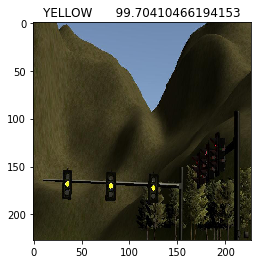

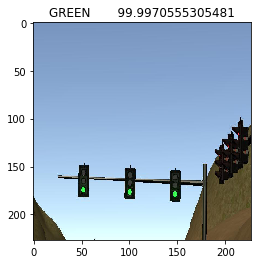

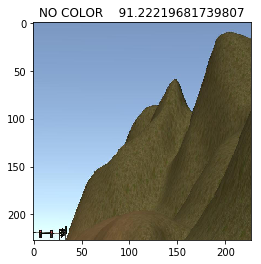

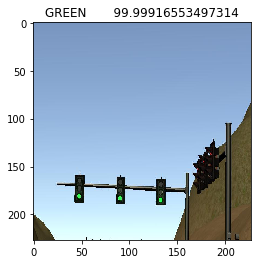

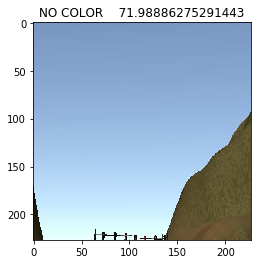

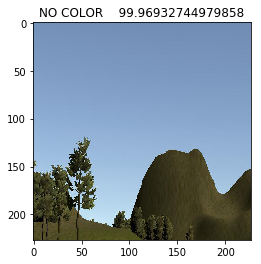

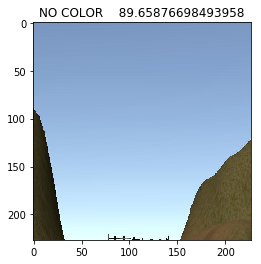

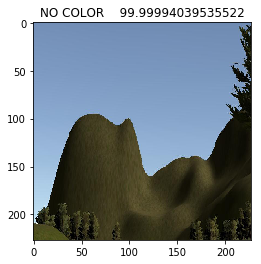

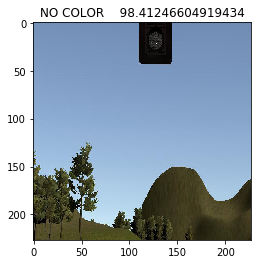

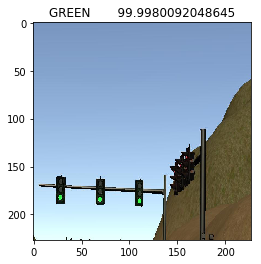

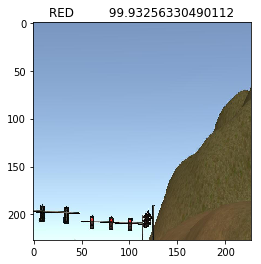

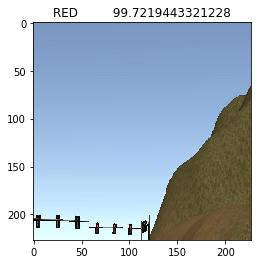

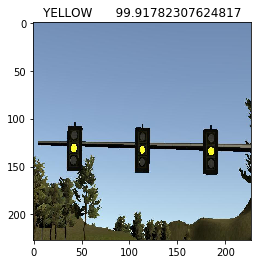

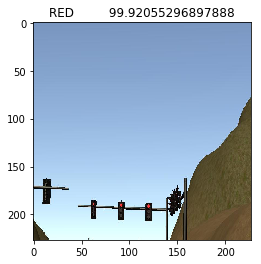

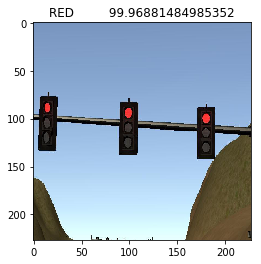

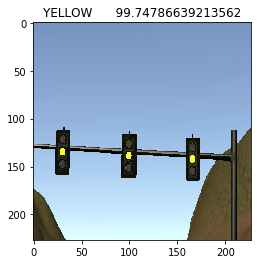

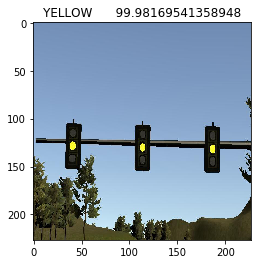

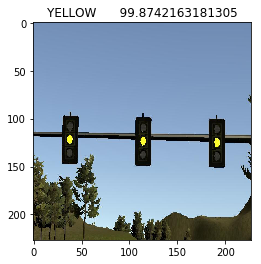

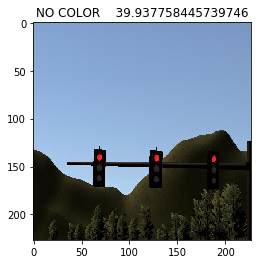

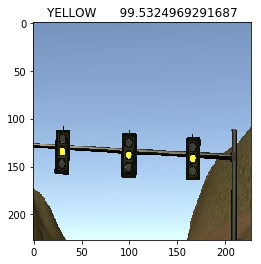

In [23]:
traffic_light_states = ['GREEN', 'RED', 'YELLOW', 'NO COLOR']

for i in range(len(images[:20])):
    
    img = images[i]
    
    plt.figure()
    
    prediction = loaded_model.predict(np.array([img]))[0]
    #print(prediction)
    prediction_label = traffic_light_states[prediction.argmax()]
    
    plt.title('{0:10}  {1}'.format(prediction_label, prediction.max()*100.0) )
    plt.imshow(img)


## Double check the model accuracy with validation samples (real)

In [51]:
real_img_data_dir = "data/annotated/dataset-sdcnd-capstone/data/real_training_data"

real_img_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = False,
fill_mode = "nearest",
zoom_range = 0.0,
width_shift_range = 0.0,
height_shift_range=0.0,
rotation_range=0)

real_img_generator = real_img_datagen.flow_from_directory(
real_img_data_dir,
target_size = (img_height, img_width),
class_mode = "categorical")

Found 704 images belonging to 4 classes.
{'yellow': 3, 'red': 1, 'green': 0, 'unknown': 2}


Real samples: 32


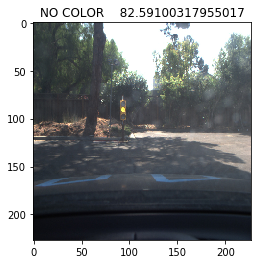

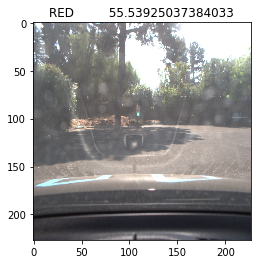

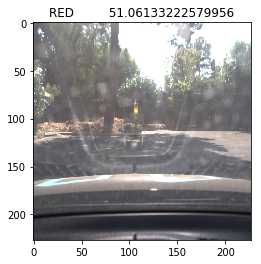

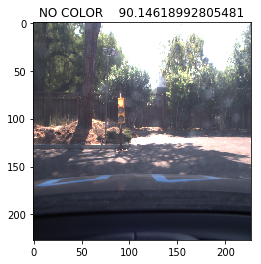

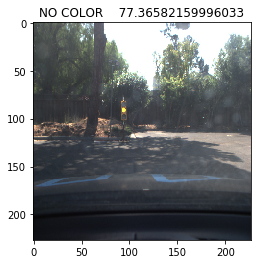

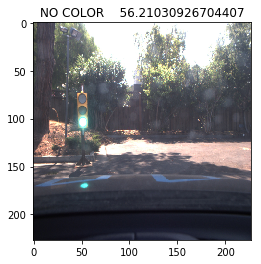

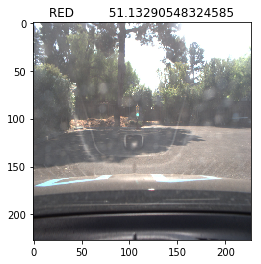

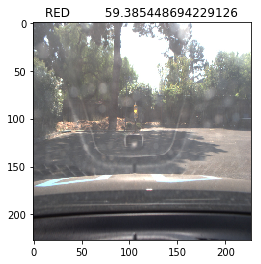

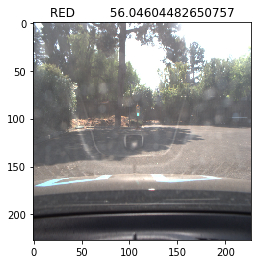

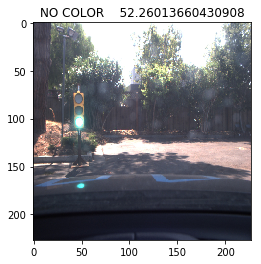

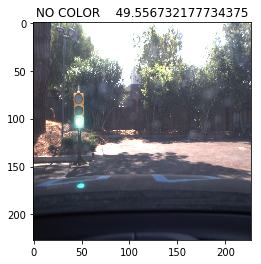

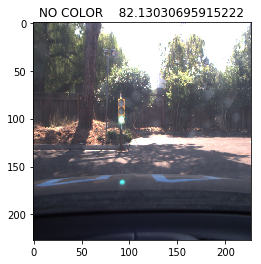

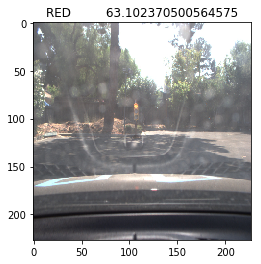

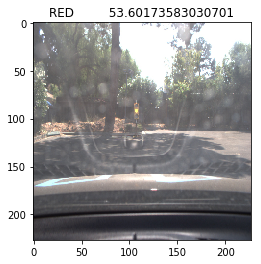

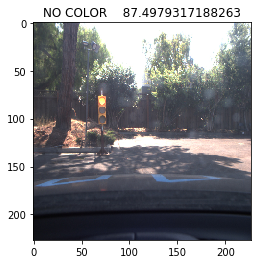

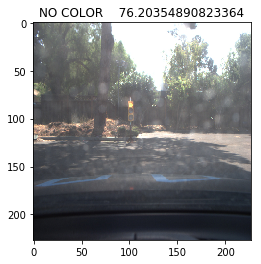

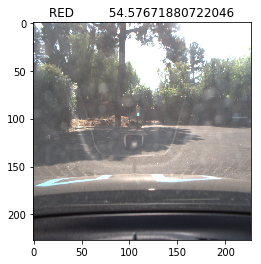

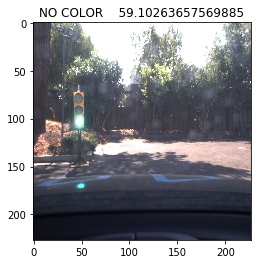

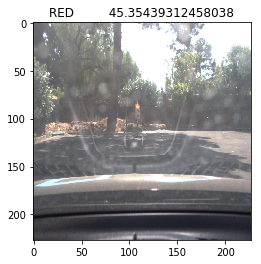

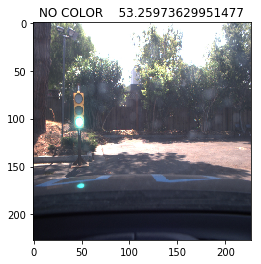

In [52]:
traffic_light_states = ['GREEN', 'RED', 'YELLOW', 'NO COLOR']

real_images, real_labels = next(real_img_generator)

print('Real samples: {}'.format(len(real_labels)))

for i in range(len(real_images[:20])):
    
    img = real_images[i]
    
    plt.figure()
    
    prediction = loaded_model.predict(np.array([img]))[0]
    prediction_label = traffic_light_states[prediction.argmax()]
    
    plt.title('{0:10}  {1}'.format(prediction_label, prediction.max()*100.0) )
    plt.imshow(img)
